<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_pandas_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>

# Pandas bevezető 1.

https://klajosw.blogspot.com/

https://github.com/klajosw/

---

# Mi az a pandas?

A pandas egy adatkezelő függvénykönyvtár, amit a Data Scientistek nagyon szeretnek. Az adatokat táblázatos formában kezeli. A táblázatoknak van fejlécük és indexük. Heterogén adatokat tárolhatunk: szöveges, számadat, igazságérték, dátum stb. Az adatok típusa egy oszlopon belül sem kell, hogy azonos legyen.

A pandas remekül együttműködik a Python gépi tanuló könyvtárával (scikit-learn) és a legelterjedtebb vizualizációs könyvtárakkal (matplotlib, seaborn).

In [0]:
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

In [0]:
grades = pd.DataFrame(
    {
        'subject': ['analízis 1', 'digitális technika 1', 
                    'fizika 1', 'mikmak', 'programozás alapjai 1', 'szoftvertechonológia',
                   'bevezetés a számításelméletbe 1'],
        'grade': [3, 4, 3, 2, 5, 1, 4],
        'teacher': ['a', 'b', 'a', 'c', 'd', 'd', 'd'],
        'semester': [1, 1, 2, 2, 1, 3, 1],
    }
)
grades

,subject,grade,teacher,semester
0,analízis 1,3,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1
5,szoftvertechonológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


A DataFrame elejét a .head függvénnyel, a végét a .tail-lel nézhetjük meg. Ennek akkor van jelentősége, ha nagy táblázatokkal dolgozunk.

In [0]:
grades.head()

,subject,grade,teacher,semester
0,analízis 1,3,a,1
1,digitális technika 1,4,b,1
2,fizika 1,3,a,2
3,mikmak,2,c,2
4,programozás alapjai 1,5,d,1


Alapértelmezetten 5 sort ír ki, de megadhatjuk paraméterként pontosan hány sort szeretnénk látni.

In [0]:
grades.tail(2)

,subject,grade,teacher,semester
5,szoftvertechonológia,1,d,3
6,bevezetés a számításelméletbe 1,4,d,1


# Egyszerű navigálás a DataFrame-ben

Fontos megemlíteni, hogy minden művelet egy új DataFrame-mel tér vissza, beleértve a `head` és a `tail` függvényeket is, azonban ezek az új DataFrame-ek nem tényleges másolatok, hanem csak ún. slice-ok az eredetiből. A `copy` függénnyel tudunk másolatot készíteni.

A táblázat első oszlopa kitüntetett, ez a DataFrame indexe, ezzel tudjuk azonosítani a sorokat. Ugyan nem követelmény, hogy unikus legyen, de praktikus unikusra választani. Egynél több oszlopot is használhatunk indexként (multiindex).

## Oszlopok kiválasztása

Lekérhetünk csak bizonyos oszlopokat, ekkor egy új DataFrame-et kapunk, ami a választott oszlopokat tartalmazza csak. Egy oszlopot a szögletes zárójelekkel tudunk indexelni.

In [0]:
grades['teacher']

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

Amennyiben az oszlop neve nem tartalmaz szóközöket, attribútumként is elérjük.

In [0]:
grades.teacher

0    a
1    b
2    a
3    c
4    d
5    d
6    d
Name: teacher, dtype: object

A kapott eredmény nem tűnik táblázatnak és valóban más típusú

In [0]:
type(grades.teacher)

pandas.core.series.Series

Amikor a dimenziók száma egyre csökken, `Series` objektumot kapunk vissza.

Egynél több oszlop kiválasztásánál dupla zárójelet kell használni.

In [0]:
grades[['grade', 'teacher']]

,grade,teacher
0,3,a
1,4,b
2,3,a
3,2,c
4,5,d
5,1,d
6,4,d


Valójában az `[]` operátor indexének típusa alapján dől el, hogy milyen típust kapunk vissza.
Egy oszlopból is készíthethünk `DataFrame`-et `Series` helyett, ha listaként kérdezzük le:

In [0]:
print(type(grades[['grade']]))
grades[['grade']]

<class 'pandas.core.frame.DataFrame'>


,grade
0,3
1,4
2,3
3,2
4,5
5,1
6,4


## Sorok kiválasztása

A sorokat többféleképpen indexelhetjük:
1. index szerint
2. sorszám szerint

Mielőtt index szerint kérdeznénk le egy sort, állítsuk át az indexet valami beszédesebbre.

In [0]:
grades = grades.set_index('subject')
grades

,grade,teacher,semester
subject,,,
analízis 1,3,a,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechonológia,1,d,3
bevezetés a számításelméletbe 1,4,d,1


In [0]:
grades.loc['fizika 1']  # a loc után [] kell!

grade       3
teacher     a
semester    2
Name: fizika 1, dtype: object

Mivel egyetlen sort kértünk, megint `Series` objektumot kapunk.

In [0]:
type(grades.loc['fizika 1'])

pandas.core.series.Series

A Series egy egydimenziós adatsor, gondolhatunk rá úgy, mint a DataFrame egy sorára.

## Indexelés sor szerint

In [0]:
grades.iloc[1:3]  # utolsó index nincs benne, [1, 3)

,grade,teacher,semester
subject,,,
digitális technika 1,4,b,1
fizika 1,3,a,2


### Oszlopok kiválasztása az `iloc` segítségével

In [0]:
grades.iloc[:, [0, 2]]

,grade,semester
subject,,
analízis 1,3,1
digitális technika 1,4,1
fizika 1,3,2
mikmak,2,2
programozás alapjai 1,5,1
szoftvertechonológia,1,3
bevezetés a számításelméletbe 1,4,1


In [0]:
grades.iloc[:, 1:-1]

,teacher
subject,
analízis 1,a
digitális technika 1,b
fizika 1,a
mikmak,c
programozás alapjai 1,d
szoftvertechonológia,d
bevezetés a számításelméletbe 1,d


#### Tetszőleges sor és oszlop tartományok vagy kombinációk kiválasztása

In [0]:
grades.iloc[1:5, 1:2]

,teacher
subject,
digitális technika 1,b
fizika 1,a
mikmak,c
programozás alapjai 1,d


Egy sort vagy oszlopot többször is lekérdezhetünk, ráadásul akármilyen sorrendben.

In [0]:
grades.iloc[[4, 1, 1], [2, 1, 2]]

,semester,teacher,semester
subject,,,
programozás alapjai 1,1,d,1
digitális technika 1,1,b,1
digitális technika 1,1,b,1


# Egyetlen mező kiválasztása

Egy mező tartalmát sokféleképpen kiválaszthatjuk, talán így a legegyszerűbb:

In [0]:
grades.loc['fizika 1', 'grade']

3

# Szűrés

A DataFrame-ek sorain egyszerre végezhetünk műveleteket:

In [0]:
grades.semester == 1

subject
analízis 1                          True
digitális technika 1                True
fizika 1                           False
mikmak                             False
programozás alapjai 1               True
szoftvertechonológia               False
bevezetés a számításelméletbe 1     True
Name: semester, dtype: bool

Ekkor azokra a sorokra kapunk True-t, ahol igaz a feltétel. A feltételek kombinálhatóak, a zárójelezésre figyelni kell:

In [0]:
(grades.semester == 1) & (grades.teacher == 'a')

subject
analízis 1                          True
digitális technika 1               False
fizika 1                           False
mikmak                             False
programozás alapjai 1              False
szoftvertechonológia               False
bevezetés a számításelméletbe 1    False
dtype: bool

Az igazságértékek sorozatával pedig szűrhetjük a DataFrame-eket:

In [0]:
grades[grades.semester==1]

,grade,teacher,semester
subject,,,
analízis 1,3,a,1
digitális technika 1,4,b,1
programozás alapjai 1,5,d,1
bevezetés a számításelméletbe 1,4,d,1


In [0]:
grades[(grades.semester == 1) & (grades.teacher == 'a')]

,grade,teacher,semester
subject,,,
analízis 1,3,a,1


# Vektoros műveletvégzés

A pandas DataFrame-jeire és Series-eire az aritmetikai operátorok túl vannak terhelve, ezért egyszerre végezhetünk az egész táblán műveleteket.

In [0]:
grades[['grade', 'semester']] + 15

,grade,semester
subject,,
analízis 1,18,16
digitális technika 1,19,16
fizika 1,18,17
mikmak,17,17
programozás alapjai 1,20,16
szoftvertechonológia,16,18
bevezetés a számításelméletbe 1,19,16


## Az index is hasonlóan manipulálható 

In [0]:
grades.index.str.upper()

Index(['ANALÍZIS 1', 'DIGITÁLIS TECHNIKA 1', 'FIZIKA 1', 'MIKMAK',
       'PROGRAMOZÁS ALAPJAI 1', 'SZOFTVERTECHONOLÓGIA',
       'BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1'],
      dtype='object', name='subject')

Át is állítható:

In [0]:
grades.index = grades.index.str.upper()
grades

,grade,teacher,semester
subject,,,
ANALÍZIS 1,3,a,1
DIGITÁLIS TECHNIKA 1,4,b,1
FIZIKA 1,3,a,2
MIKMAK,2,c,2
PROGRAMOZÁS ALAPJAI 1,5,d,1
SZOFTVERTECHONOLÓGIA,1,d,3
BEVEZETÉS A SZÁMÍTÁSELMÉLETBE 1,4,d,1


Majd visszaállítható:

In [0]:
grades.index = grades.index.str.lower()
grades

,grade,teacher,semester
subject,,,
analízis 1,3,a,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechonológia,1,d,3
bevezetés a számításelméletbe 1,4,d,1


# Több DataFrame kezelése, merge

In [0]:
credits = pd.DataFrame(
    {
        'subject': ['analízis 1', 'fizika 1', 'programozás alapjai 2'],
        'credit': [7, 5, 5]
    }
)
credits

,subject,credit
0,analízis 1,7
1,fizika 1,5
2,programozás alapjai 2,5


## Hány kreditet érnek a tárgyak, amikre jegyet kaptunk?

In [0]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')

d

,grade,teacher,semester,subject,credit
0.0,3.0,a,1.0,analízis 1,7.0
NaN,4.0,b,1.0,digitális technika 1,NaN
1.0,3.0,a,2.0,fizika 1,5.0
NaN,2.0,c,2.0,mikmak,NaN
NaN,5.0,d,1.0,programozás alapjai 1,NaN
NaN,1.0,d,3.0,szoftvertechonológia,NaN
NaN,4.0,d,1.0,bevezetés a számításelméletbe 1,NaN
2.0,NaN,NaN,NaN,programozás alapjai 2,5.0


### A paraméterek magyarázata:

1. `left_index`: a baloldali DataFrame (grades ebben az esetben) indexe mentén joinoljon.
2. `right_on`: a jobboldali DataFrame (credits) subject mezője mentén joinoljon.
3. `how`: inner/outer. Egyezik az SQL-es joinnal.

### A joinolni kívánt mező kétféle lehet:

1. index: ekkor az indexként használt oszlopot próbálja a másik táblázattal joinolni. `left_index=True`-ra kell állítani.
2. nem index: egy vagy több nem indexként használt oszlop mentén próbál meg joinolni. `left_on=col1` vagy `left_on=[col1, col2]`

In [0]:
grades.merge(credits, left_index=True, right_on='subject', how='inner')

,grade,teacher,semester,subject,credit
0,3,a,1,analízis 1,7
1,3,a,2,fizika 1,5


## Érvénytelen adatok eldobása 

Látható, hogy nem minden tárgyhoz sikerült megtalálni a kreditszámot, hiszen nem mindegyik szerepelt a credits táblában.

A pandas NaN (not a number) tölti fel a hiányzó mezőket. Szerencsére a legtöbb műveletnek megmondhatjuk, hogy hogyan bánjon a NaN-okkal. Meg is szabadulhatunk tőlük:

In [0]:
d = d.dropna()
d

,grade,teacher,semester,subject,credit
0.0,3.0,a,1.0,analízis 1,7.0
1.0,3.0,a,2.0,fizika 1,5.0


# Szélsőérték-keresés (max, idxmax)

Sokszor vagyunk kíváncsiak arra, hogy mi egy oszlop maximuma/minimuma vagy éppen hol veszi fel ezt az értéket (argmax). A pandas tartalmaz erre beépített függvényeket.

## DataFrame-re

Mi az egyes oszlopok maximuma?

In [0]:
print(type(grades.max()))
grades.max()

<class 'pandas.core.series.Series'>


grade       5
teacher     d
semester    3
dtype: object

A `max` függvény egy Series-zel tér vissza, ami minden oszlop maximumát tartalmazza. Sorokra is felthetjük ugyanezt a kérdést, bár erre az adatra nem sok értelme van:

In [0]:
grades.max(axis=1)

subject
analízis 1                         3
digitális technika 1               4
fizika 1                           3
mikmak                             2
programozás alapjai 1              5
szoftvertechonológia               3
bevezetés a számításelméletbe 1    4
dtype: int64

Hol veszi fel a maximumát?

In [0]:
# grades.idxmax()  # hibát kapunk, mert az egyik oszlop szöveges
grades[['grade', 'semester']].idxmax()

grade       programozás alapjai 1
semester     szoftvertechonológia
dtype: object

Indexelhetünk is a visszakapott értékekkel, így a legmagasabb értékeket tartalmazó sorokat kapjuk meg.

In [0]:
grades.loc[grades[['grade', 'semester']].idxmax()]

,grade,teacher,semester
subject,,,
programozás alapjai 1,5,d,1
szoftvertechonológia,1,d,3


A számadatot tartalmazó oszlopok közül megkaptuk, hogy melyik sornál veszi fel a maximális értéket. Holtverseny esetén a legelső előfordulást adja vissza.

Az `idxmax` függvény `Series`-re hasonlóan működik, csak az eredmény egyetlen skalár érték:

In [0]:
grades.grade.idxmax()

'programozás alapjai 1'

# Csoportosítás (groupby)

A groupby függvénnyel tetszőleges oszlop mentén csoportosíthatjuk a DataFrame-et.

In [0]:
g = credits.groupby('credit')

In [0]:
g.groups

{5: Int64Index([1, 2], dtype='int64'), 7: Int64Index([0], dtype='int64')}

Nem csak oszlop szerint tudunk csoportosítani, hanem tetszőleges kifejezés szerint.

In [0]:
credits.credit % 3

0    1
1    2
2    2
Name: credit, dtype: int64

Eszerint groupby:

In [0]:
credits.groupby(credits.credit % 3)

Csoportonként végezhetünk műveleteket:

In [0]:
grades.groupby("semester").mean()

,grade
semester,
1,4.0
2,2.5
3,1.0


Egynél több oszlop szerint is csoportosíthatunk, ekkor az olszopok értékeinek összes kombinációja (direkt szorzat) szerepelni fog az indexben.

A `size` függvénnyel az egyes csoportok elemeinek számát kérhetjük le.

In [0]:
grades.groupby(["semester", "teacher"]).size()

semester  teacher
1         a          1
          b          1
          d          2
2         a          1
          c          1
3         d          1
dtype: int64

Ismét `Series` objektumot kaphatunk. A könnyebb olvashatóság kedvéért `DataFrame`-é konvertálhatjuk:

In [0]:
grades.groupby(["semester", "teacher"]).size().to_frame()

0
semester teacher   
1        a        1
         b        1
         d        2
2        a        1
         c        1
3        d        1

# Rendezés

A `DataFrame`-eket többféleképpen rendezhetjük.

Index szerint rendezve:

In [0]:
grades.sort_index()

,grade,teacher,semester
subject,,,
analízis 1,3,a,1
bevezetés a számításelméletbe 1,4,d,1
digitális technika 1,4,b,1
fizika 1,3,a,2
mikmak,2,c,2
programozás alapjai 1,5,d,1
szoftvertechonológia,1,d,3


Illetve egy vagy több oszlop szerint rendezve:

In [0]:
grades.sort_values(['grade', 'semester'])

,grade,teacher,semester
subject,,,
szoftvertechonológia,1,d,3
mikmak,2,c,2
analízis 1,3,a,1
fizika 1,3,a,2
digitális technika 1,4,b,1
bevezetés a számításelméletbe 1,4,d,1
programozás alapjai 1,5,d,1


Fordított sorrendben:

In [0]:
grades.sort_index(ascending=False)

,grade,teacher,semester
subject,,,
szoftvertechonológia,1,d,3
programozás alapjai 1,5,d,1
mikmak,2,c,2
fizika 1,3,a,2
digitális technika 1,4,b,1
bevezetés a számításelméletbe 1,4,d,1
analízis 1,3,a,1


# Vizualizáció (plot)

A matplotlib modullal együttműködve rengeteg vizualizációs lehetőségünk van.

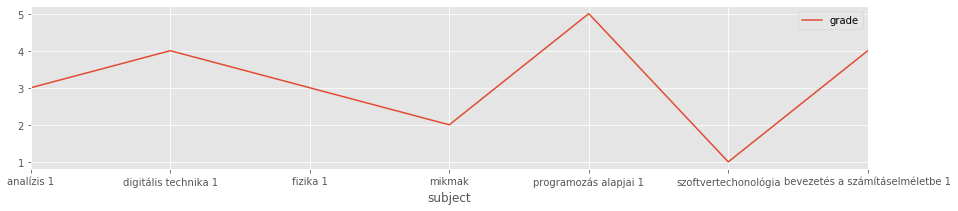

In [0]:
grades.plot(y='grade')

Az oszlopdiagramnak több értelme lenne:

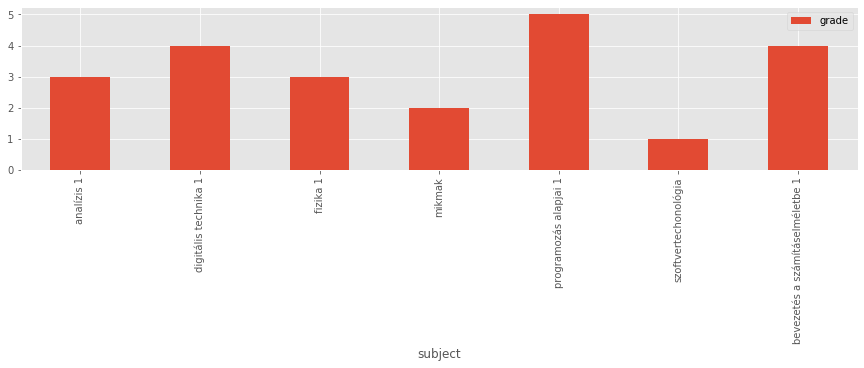

In [0]:
grades.plot(y='grade', kind='bar')

Nem adtuk meg az x tengelyt, ekkor automatikusan a DataFrame indexét használja, ami ebben az esetben a tárgyakat jelenti.

Ábrázolhatnánk félév szerint is egy scatter ploton.

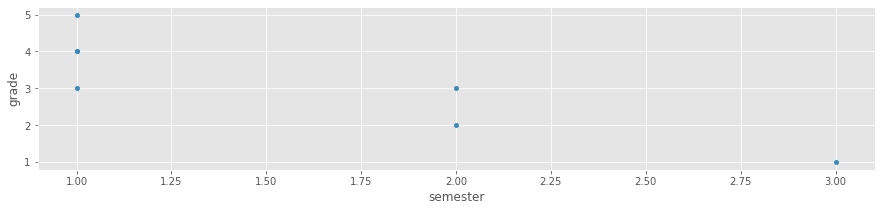

In [0]:
grades.plot(x='semester', y='grade', kind='scatter')

## Amire érdemes figyelni (GOTCHAs)

### Minden művelet új DataFrame-et ad vissza

Szinte minden művelet alapértelmezetten egy új DataFrame-mel tér vissza, nem módosítja a paramétereit. Ezt el kell tárolnunk, ha használni akarjuk.

### Egy cellában az utolsó kifejezés visszatérési értéke kiíródik, de a többi nem

Ha a többit is szeretnénk kiírni, használjuk a print függvényt.

---

# GPU használat mint gyorsítási lehetőség



---

In [0]:
## GPU használat minta (7 millió számlálás)

import numba
import numpy as np 
from timeit import default_timer as timer    
  
# normal funkcio cpu futással
def func(a):                                 
    for i in range(7000000): 
        a[i]+= 1      
  
   
@numba.jit    # ezzel kiegészítve kb 500 szoros gyorsulás (GPU használat miatt)
def func2(a): 
    for i in range(7000000): 
        a[i]+= 1
        
        
if __name__=="__main__": 
    n = 7000000                            
    a = np.ones(n, dtype = np.float64) 
    b = np.ones(n, dtype = np.float32) 
      
    start = timer() 
    func(a) 
    print("CPU-val (64 bit): ", timer()-start)     
      
    start = timer() 
    func2(a) 
    print("GPU-val (64 bit): ", timer()-start) 
    
    print('-----------------------------------------')
    
    start = timer() 
    func(b) 
    print("CPU-val (32 bit): ", timer()-start)     
      
    start = timer() 
    func2(b) 
    print("GPU-val (32 bit): ", timer()-start)    
    

CPU-val (64 bit):  3.273661499999889
GPU-val (64 bit):  0.06443459999991319
-----------------------------------------
CPU-val (32 bit):  17.19063389999974
GPU-val (32 bit):  0.06146840000019438
